# Primer practico diplodatos

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
import scipy

In [3]:
seaborn.__version__

'0.9.0'

In [4]:
seaborn.set_context(context='talk', font_scale=1.2)

In [6]:
dataset = pandas.read_csv("hfi_cc_2018.csv")

In [8]:
dataset.shape

(1458, 123)

In [9]:
dataset.columns

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

In [10]:
dataset[:5]

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


In [20]:
dataset.columns  # Way too many columns!

important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [30]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


# 1) Estadísticos descriptivos

1.1 Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [16]:
#Se calculan los rangos para todas las variables que no son categóricas

In [12]:

rangos={}
for col in important_cols:
    try:
        rangos[col]=numpy.ptp(dataset[col])
    except:
        pass
rangos        
        

{'year': 8,
 'pf_identity_legal': 10.0,
 'pf_identity_parental_marriage': 10.0,
 'pf_identity_parental_divorce': 10.0,
 'pf_identity_parental': 10.0,
 'pf_identity_sex_male': 10.0,
 'pf_identity_sex_female': 10.0,
 'pf_identity_sex': 10.0,
 'pf_identity_divorce': 10.0,
 'pf_identity': 10.0,
 'ef_score': 6.31,
 'ef_rank': 161.0,
 'hf_score': 5.360486062,
 'hf_rank': 161.0}

1.2 Obtener media, mediana y desviación estándar de las variables pf_identity
y hf_score en el mundo y compararla con la de Latinoamérica y el caribe.
¿Tiene sentido calcular la moda?

In [19]:
# se calculan las medidas descriptivas para las variables 'pf_identity' y 'hf_score' para todos los paises que conforman 
#la muestra y luego para el caso particular de los paises latinoamericanos y caribeños

In [14]:
print('Mundo')
print("Moda pf_identity: ",scipy.stats.mode(dataset["pf_identity"],nan_policy="omit")[0][0],". Se repite ",scipy.stats.mode(dataset["pf_identity"],nan_policy="omit")[1][0]," veces")  
print("Mediana pf_identity: ",numpy.nanmedian(dataset["pf_identity"]) )
print("Media pf_identity: ",numpy.nanmean(dataset["pf_identity"]))
print("Desviación estándar pf_identity: ",numpy.nanstd(dataset["pf_identity"]),"/n")
print('---------------------------------------')
print("Moda hf_score: ",scipy.stats.mode(dataset["hf_score"],nan_policy="omit")[0][0],". Se repite ",scipy.stats.mode(dataset["hf_score"],nan_policy="omit")[1][0]," veces")  
print("Mediana hf_score: ",numpy.nanmedian(dataset["hf_score"]) )
print("Media hf_score: ",numpy.nanmean(dataset["hf_score"]))
print("Desviación estándar hf_score: ",numpy.nanstd(dataset["hf_score"]))

Mundo
Moda pf_identity:  10.0 . Se repite  601.0  veces
Mediana pf_identity:  9.166666667000001
Media pf_identity:  7.334179970968069
Desviación estándar pf_identity:  3.1583260555019637 /n
---------------------------------------
Moda hf_score:  7.5681402879999995 . Se repite  1.0  veces
Mediana hf_score:  6.923840432999999
Media hf_score:  6.993443755514514
Desviación estándar hf_score:  1.0254388834900923


In [15]:
print('Latinoamerica y el caribe ')
print("Moda pf_identity: ",scipy.stats.mode(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'],nan_policy="omit")[0][0], ". Se repite ",scipy.stats.mode(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'],nan_policy="omit")[1][0]," veces")
print("Mediana pf_identity: ",numpy.nanmedian(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity']))
print("Media pf_identity: ",numpy.nanmean(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity']))
print("Desviación estándar pf_identity: ",numpy.nanstd(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity']),"/n")
print('---------------------------------------')
print("Moda hf_score: ",scipy.stats.mode(dataset[dataset['region']=='Latin America & the Caribbean']['hf_score'],nan_policy="omit")[0][0], ". Se repite ",scipy.stats.mode(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'],nan_policy="omit")[1][0]," veces")
print("Mediana hf_score: ",numpy.nanmedian(dataset[dataset['region']=='Latin America & the Caribbean']['hf_score']))
print("Media hf_score: ",numpy.nanmean(dataset[dataset['region']=='Latin America & the Caribbean']['hf_score']))
print("Desviación estándar hf_score: ",numpy.nanstd(dataset[dataset['region']=='Latin America & the Caribbean']['hf_score']),"/n")

Latinoamerica y el caribe 
Moda pf_identity:  10.0 . Se repite  136.0  veces
Mediana pf_identity:  10.0
Media pf_identity:  8.765086206909483
Desviación estándar pf_identity:  1.7080389127332938 /n
---------------------------------------
Moda hf_score:  6.469847841 . Se repite  136.0  veces
Mediana hf_score:  7.02804474
Media hf_score:  7.047981929952586
Desviación estándar hf_score:  0.6075903811029444 /n


1.3  ¿Son todos los valores de pf_identity y hf_score directamente comparables? ¿Qué otra variable podría influenciarlos?

In [60]:
x=dataset[important_cols[12:14]]
x[:5]

,pf_identity,ef_score
0,6.250000,7.54
1,0.833333,4.99
2,7.500000,5.17
3,10.000000,4.84
4,8.000000,7.57


1.4 ¿Cómo pueden sanearse los valores faltantes?

1.5 ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos?
¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

In [31]:
# Para 'hf_score'
quartiles=numpy.nanquantile(dataset["hf_score"],[0.25,0.75])

rango_intercuartil=quartiles[1]-quartiles[0]

extremo_max, extremo_min = quartiles[1]+rango_intercuartil,quartiles[0]-rango_intercuartil

print("Cantidad de valores menores al extremo inferior: ",len(dataset[dataset["hf_score"]<extremo_min]) )


print("Cantidad de valores mayores al extremo superior: ",len(dataset[dataset["hf_score"]>extremo_max]) )

Cantidad de valores menores al extremo inferior:  19
Cantidad de valores mayores al extremo superior:  0


In [21]:
# Para pf_identity

quartiles=numpy.nanquantile(dataset["pf_identity"],[0.25,0.75])

rango_intercuartil=quartiles[1]-quartiles[0]

extremo_max, extremo_min = quartiles[1]+rango_intercuartil,quartiles[0]-rango_intercuartil

print("Cantidad de valores menores al extremo inferior: ",len(dataset[dataset["pf_identity"]<extremo_min]) )

print("Cantidad de valores mayores al extremo superior: ",len(dataset[dataset["pf_identity"]>extremo_max]) )


Cantidad de valores menores al extremo inferior:  0
Cantidad de valores mayores al extremo superior:  0


# 2) Agregación de Datos

2.1 Grafiquen la media de la variable pf_identity y hf_score a través de los años.

In [44]:
# Se grafican las medias de las variables 'pf_identity' y 'hf_score'

(0, 10)

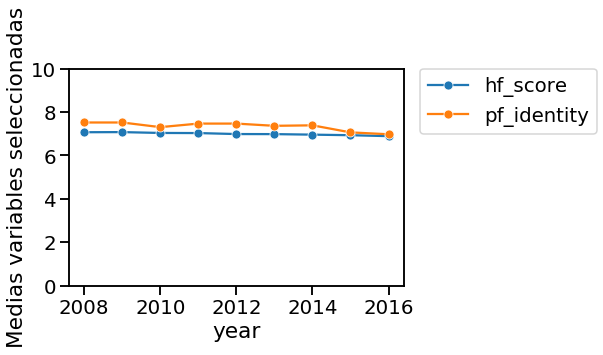

In [43]:

medias=pandas.DataFrame(columns=["year","pf_identity","hf_score"])
for anio in numpy.unique(dataset["year"]):

    media_hf=numpy.nanmean(dataset["hf_score"][dataset["year"]==anio])
    media_pf=numpy.nanmean(dataset["pf_identity"][dataset["year"]==anio])
    
    medias=medias.append({"year":anio,"hf_score":media_hf,"pf_identity":media_pf},ignore_index=True)
    
seaborn.lineplot(x="year",y="hf_score",data=medias,marker="o",label="hf_score")
seaborn.lineplot(x="year",y="pf_identity",data=medias,marker="o",label="pf_identity")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Medias variables seleccionadas')
plt.ylim(0,10)



2.2 Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?

In [72]:
# Se obtienen las diferentes regiones que contiene el dataset
print('Las regiones consideradas son: '
      ,numpy.unique(dataset["region"]))

Las regiones consideradas son:  ['Caucasus & Central Asia' 'East Asia' 'Eastern Europe'
 'Latin America & the Caribbean' 'Middle East & North Africa'
 'North America' 'Oceania' 'South Asia' 'Sub-Saharan Africa'
 'Western Europe']


In [118]:
# Se calcula la media de la variable 'pf_identity' para cada región
for anio in numpy.unique(dataset["year"]):
    
    media_pf=numpy.nanmean(dataset["pf_identity"][dataset["year"])
                                                                                                                                
    
    medias=medias.append({"year":anio,"pf_identity":media_pf},ignore_index=True)
    
seaborn.lineplot(x="year",y="pf_identity",data=medias,marker="o", 
                hue= "region")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0,10)
seaborn.despine()

SyntaxError: invalid syntax (<ipython-input-118-e6afd5de1bcd>, line 4)

2.3 Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable pf_identity en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

# 3) Distribuciones

3.1 Graficar en un mismo histograma la distribución de la variable pf_identity en global, y en Latinoamérica y el caribe. Repetir para la variable hf_score. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?

3.2 Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. 

3.3 Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas

3.4 Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

# 4) Correlaciones

En este ejercicio queremos responder a las preguntas

Las libertades sociales y económicas, ¿van siempre de la mano?
¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?
Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score.

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación

4.1 ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?

4.2 Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.

4.3 Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no.

4.4 [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable region es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)